# Cel analizy:
Analiza została stworzona podczas Hackatonu organizowanego przez KN Ekonometryk AGH.

Najpierw importujemy wszystkie potrzebne nam biblioteki:

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import scipy.stats as sci

Oraz wczytujemy dane:

In [2]:
data = pd.read_csv('/kaggle/input/d/marlenasadowska/football/PRM_L2.csv')

# Pierwsze spojrzenie na dane

In [3]:
data.head()

,Level,Date,Hour,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,PRM,09.08.2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,9,11,2,0,2,0,0,1.14,10.00,19.00
1,PRM,10.08.2019,12:30,West Ham,Man City,0,5,A,0,1,...,13,1,1,2,2,0,0,12.00,6.50,1.22
2,PRM,10.08.2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,19,3,4,2,1,0,0,1.95,3.60,3.60
3,PRM,10.08.2019,15:00,Burnley,Southampton,3,0,H,0,0,...,12,2,7,0,0,0,0,2.62,3.20,2.75
4,PRM,10.08.2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,14,6,2,2,1,0,1,3.00,3.25,2.37


## Wyczyszczenie danych

Sprawdzamy, czy występują braki danych oraz czy wszystkie dane mają odpowiednie typy.

In [4]:
data.isna().sum()

Level       0
Date        0
Hour        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       8
B365D       8
B365A       8
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7880 entries, 0 to 7879
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Level     7880 non-null   object 
 1   Date      7880 non-null   object 
 2   Hour      7880 non-null   object 
 3   HomeTeam  7880 non-null   object 
 4   AwayTeam  7880 non-null   object 
 5   FTHG      7880 non-null   int64  
 6   FTAG      7880 non-null   int64  
 7   FTR       7880 non-null   object 
 8   HTHG      7880 non-null   int64  
 9   HTAG      7880 non-null   int64  
 10  HTR       7880 non-null   object 
 11  Referee   7880 non-null   object 
 12  HS        7880 non-null   int64  
 13  AS        7880 non-null   int64  
 14  HST       7880 non-null   int64  
 15  AST       7880 non-null   int64  
 16  HF        7880 non-null   int64  
 17  AF        7880 non-null   int64  
 18  HC        7880 non-null   int64  
 19  AC        7880 non-null   int64  
 20  HY        7880 non-null   int6

Nie planujemy używać danych z ostatnich kolumn, dlatego nie przejmujemy się brakami w tych danych.

## Dodatkowe kolumny

Dodajemy kolumny, które mogą nam się przydać w analizie.

In [6]:
data['Pełna data'] = pd.to_datetime(data['Date']+ ' ' + data['Hour'], format="%d.%m.%Y %H:%M")
data["Wynik"] = data["FTHG"].astype(str) + ":" + data["FTAG"].astype(str)
data["Wszystkie gole"] = data["FTHG"] + data["FTAG"]
data["Faule na mecz"] = data["HF"] + data["AF"]
data['Czerwone na mecz'] = data["HR"] + data["AR"]
data['Żółte na mecz'] = data["HY"] + data["AY"]
data['Przewaga gospodarzy'] = data["FTHG"] - data["FTAG"]

# Gole, czyli to, co w meczu najważniejsze

Na początku przyjrzymy się golom - jak dużo pada ich w trakcie meczu i jak wygląda ich rozkład.

Text(0.5, 1.0, 'Liczba meczów z konkretną liczbą strzelonych goli')

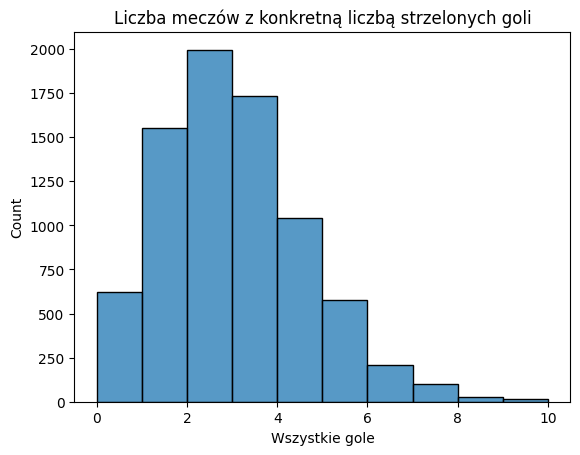

In [7]:
sns.histplot(data=data, x = "Wszystkie gole", binwidth = 1)
plt.title('Liczba meczów z konkretną liczbą strzelonych goli')

Wykres ten przypomina rozkład Poissona. Sprawdzimy, czy rzeczywiście można go tak zakwalifikować.
 
## Rozkład goli a rozkład Poissona

Zakładając, że zmienna rzeczywiście ma rozkład Poissona wiemy, że wariancja powinna mieć taką samą wartość jak wariancja

In [8]:
ex_gole = stat.mean(data["Wszystkie gole"])
var_gole = stat.variance(data["Wszystkie gole"])
ex_gole, var_gole

(2.554441624365482, 2.583912240531439)

Istotnie, wartość oczekiwana wynosi 2,55 a wariancja 2,58. Oznacza to, iż średnio w trakcie meczu pada 2,55 goli (czyli między 2 i 3 gole). Dodatkowo, wartości przeciętnie odstają o średniej o 1,6.

Świadomi jak podobne są do siebie wartość oczekiwana i wariancja, wygenerujmy rozkład Posissona dla lambdy = 2,56. Zakładamy, że będzie on bardzo podobny do rozkładu liczby strzelonych goli.

Text(0.5, 1.0, 'Rozkład Poissona')

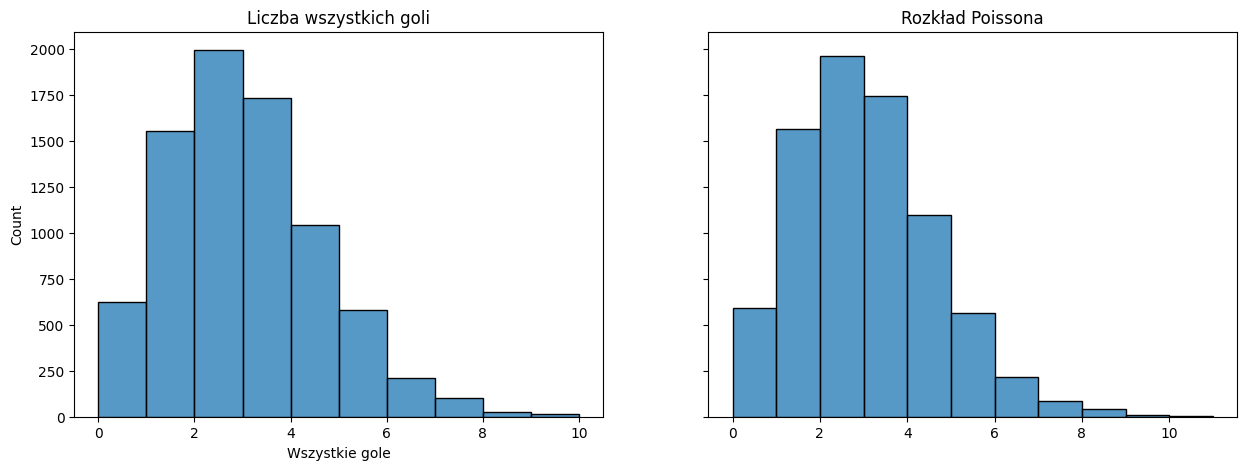

In [9]:
liczba_wierszy = data.shape[0]
poisson = np.random.poisson(lam = 2.56, size = liczba_wierszy)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.histplot(ax=axes[0], data = data, x='Wszystkie gole', binwidth=1)
axes[0].set_title('Liczba wszystkich goli')
sns.histplot(ax=axes[1], data = poisson, binwidth=1)
axes[1].set_title('Rozkład Poissona')

Nie myliliśmy się - podobieństwo widać już na pierwszy rzut oka.

Sprawdźmy teraz, jak liczba goli zdobyta w meczu zależy od ligi?

# Czy któraś liga się wyróżnia?

Text(0.5, 1.0, 'Liczba zdobytych goli na mecz w zależności od ligi')

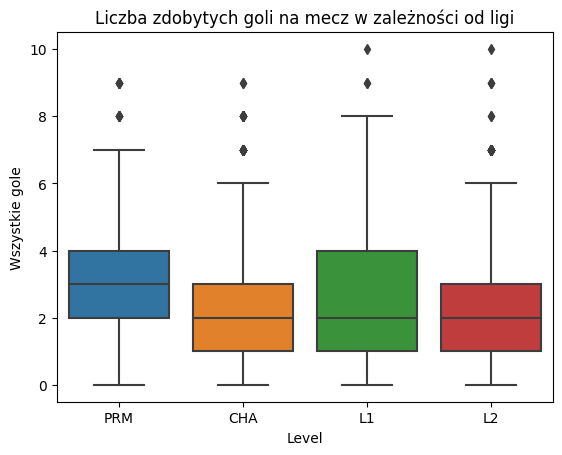

In [10]:
sns.boxplot(data, x = "Level", y='Wszystkie gole')
plt.title("Liczba zdobytych goli na mecz w zależności od ligi")

Zdecydowanie najwięcej goli zdobywa się w Prermier League (oznaczenie PRM). Może jest to jakiś sposób zależne od liczby fauli na mecz w danych ligach?

# Która liga fauluje najmniej?

Text(0.5, 1.0, 'Liczba fauli na mecz w zależności od ligi')

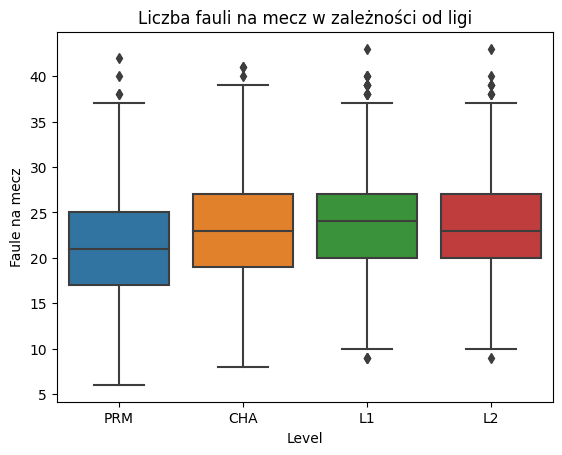

In [11]:
sns.boxplot(data[data['Faule na mecz'] < 80], x = "Level", y='Faule na mecz')
plt.title("Liczba fauli na mecz w zależności od ligi")

Okej, to już coś ciekawego. W Premier League strzela się zarówno najwięcej goli, jak i najmniej fauluje.

## Czy najmniej fauli oznacza najmniej kartek?

Text(0.5, 1.0, 'Liczba żółtych kartek na mecz w zależności od ligi')

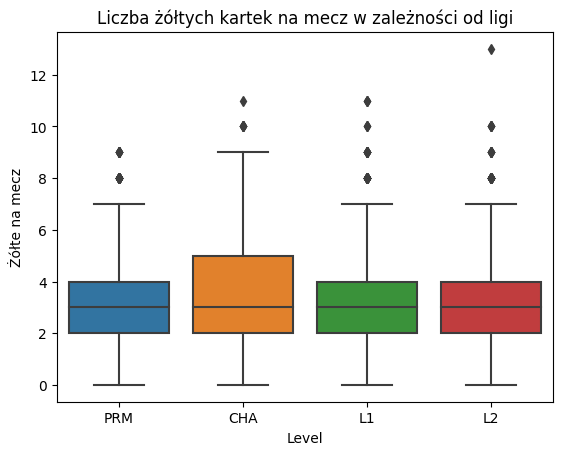

In [12]:
sns.boxplot(data, x = "Level", y='Żółte na mecz')
plt.title("Liczba żółtych kartek na mecz w zależności od ligi")

Co ciekawe, mimo różnic w liczbie fauli, w każdym meczu liczba kartek na mecz jest podobna. W szczególności zawodnicy PRM otrzymują tyle samo żółtych kartek, choć widzieliśmy, że dokonują mniej liczby fauli. Być może ich przewinienia są poważniejsze.


# Kartki, faule i inne nieuczciwe zagrania

Przyjrzyjmy się jeszcze kartkom zdobywanym przez zespoły na mecz

<Axes: xlabel='Kartki na mecz', ylabel='Count'>

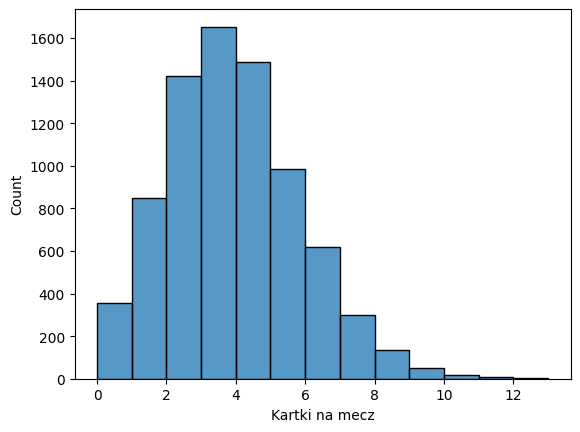

In [13]:
data["Kartki na mecz"] = data['Czerwone na mecz'] + data['Żółte na mecz']
sns.histplot(data = data, x = "Kartki na mecz", binwidth = 1)

Ponownie - wykres ten przypomina mi rokład Poissona, zatem przeprowadzę podobną analizę jak przy sumarycznej liczbie goli.

## Rozkład Poissona a liczba kartek na mecz

In [14]:
ex_kartki= stat.mean(data["Kartki na mecz"])
var_kartki = stat.variance(data["Kartki na mecz"])
ex_kartki, var_kartki

(3.4434010152284262, 3.6779739627861248)

Wartości są sobie bliskie, choć nie tak bardzo, jak przy liczbie goli. 

Stworzymy wykres Poissona dla lambda = 3,56 i porównamy go do wykresu liczby kartek w meczu.

Text(0.5, 1.0, 'Rozkład Poissona z lambda = 3,4')

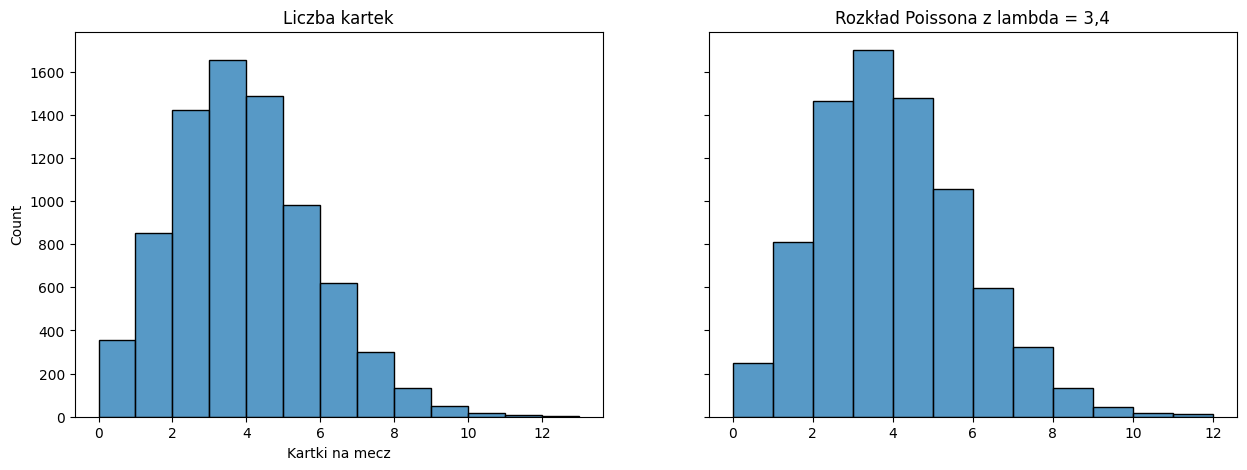

In [15]:
poisson_kartki = np.random.poisson(lam = 3.56, size = liczba_wierszy)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.histplot(ax=axes[0], data = data, x="Kartki na mecz", binwidth=1)
axes[0].set_title('Liczba kartek')
sns.histplot(ax=axes[1], data = poisson_kartki, binwidth=1)
axes[1].set_title('Rozkład Poissona z lambda = 3,4')

Wykresy są podobne, choć nie aż tak perfekcyjne jak były, gdy porównywaliśmy do wykresu Poissona łączną liczbę goli

## Kiedy w meczu jest więcej goli - przy dużej, czy niskiej liczbie fauli?

<Axes: xlabel='Wszystkie gole', ylabel='Faule na mecz'>

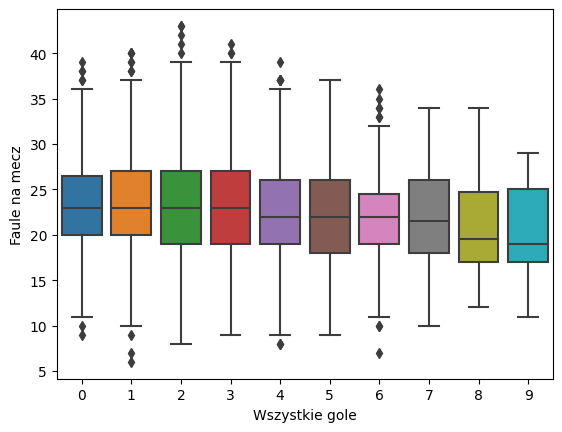

In [16]:
sns.boxplot(data=data[(data['Wszystkie gole'] < 10) & (data['Faule na mecz'] < 80)], x='Wszystkie gole', y='Faule na mecz')

Nie jest to duża różnica, ale widać ją szczególnie dla większych wartości goli. Gdy w meczu pada więcej goli, fauli zazwyczaj jest mniej. Zapewne wtedy więcej czasu poświęca się na efektywną grę, zamiast przerw.

Nasuwa się pytanie, czy liczba fauli gości i gospodarzy jest jednakowa? Może ma to jakiś wpływ na wynik?

## Czy gospodarze faulują mniej?

Text(0.5, 1.0, 'Liczba fauli gości')

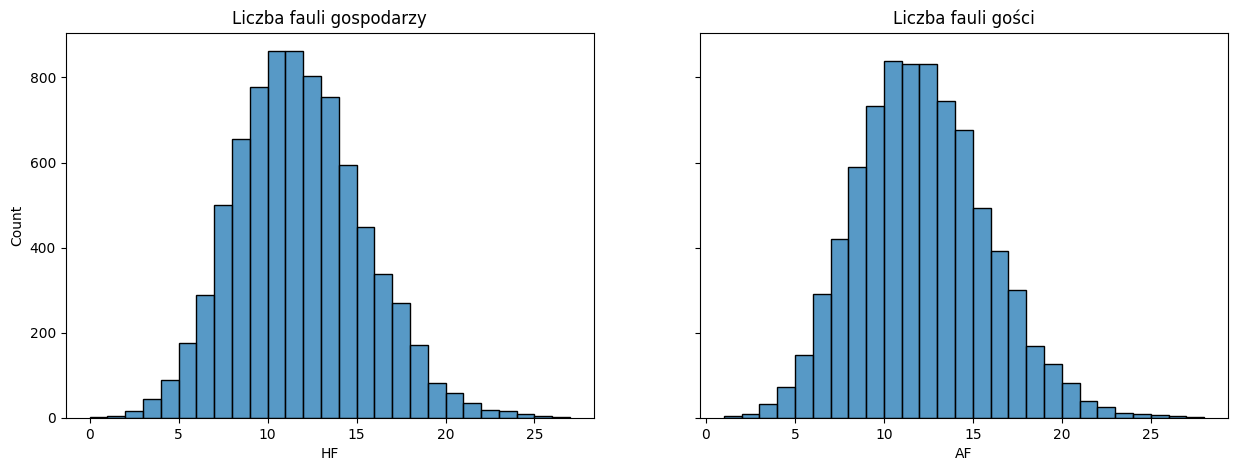

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.histplot(ax=axes[0], data = data[data['Faule na mecz'] < 80], x='HF', binwidth=1)
axes[0].set_title('Liczba fauli gospodarzy')
sns.histplot(ax=axes[1], data = data[data['Faule na mecz'] < 80], x='AF', binwidth=1)
axes[1].set_title('Liczba fauli gości')

Te wykresy wyglądają bardzo podobnie. Dlatego przeprowadzimy test zgodności Kołmogorowa-Smirnowa, aby sprawdzić, czy rozkłady możemy uznać za istotnie jednakowy.

In [18]:
sci.kstest(rvs = data["HF"], cdf = data["AF"])

KstestResult(statistic=0.038451776649746194, pvalue=1.7385498698014813e-05, statistic_location=11, statistic_sign=1)

Wynik  z bardzo niskim p-value oznacza, że nie możemy stwierdzić, że powyższe zmienne mają jednakowy rozkład. Warto jednak zaznaczyć, że test ten jest przeznaczony dla zmiennych o rozkadzie ciągłym. Nasze zmienne mają natomiast rozkłady skokowe, co mogło zaburzyć wynik.

Czy jednak wygrywają tak samo często?

# Czy gospodarze są (lub bywają) lepsi?

Text(0.5, 1.0, 'Częstotliwość wygrywania meczy')

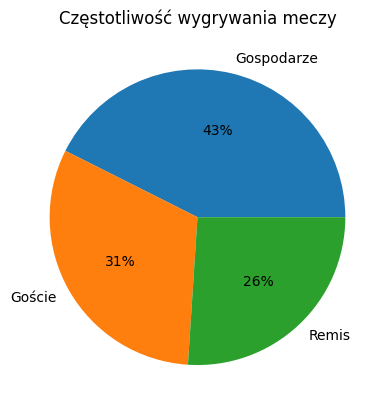

In [19]:
plt.pie(data["FTR"].value_counts(), labels = ["Gospodarze", "Goście", "Remis"],  autopct='%.0f%%')
plt.title("Częstotliwość wygrywania meczy")

Na tym wykresie zdecydowanie widać, że częściej wygrywają gospodarze. Sprawdźmy zatem, ile każda ze stron strzela goli.

## Gole gospodarzy a gości

Text(0.5, 1.0, 'Liczba goli gości')

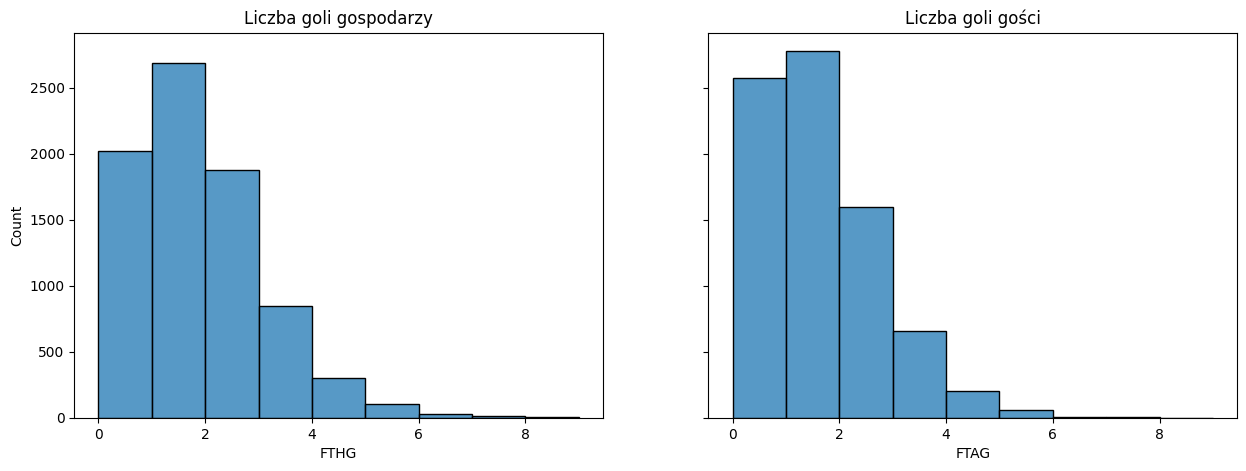

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.histplot(ax=axes[0], data = data, x='FTHG', binwidth=1)
axes[0].set_title('Liczba goli gospodarzy')
sns.histplot(ax=axes[1], data = data, x='FTAG', binwidth=1)
axes[1].set_title('Liczba goli gości')

Ciężko z tego dużo wywnioskować, ale rzeczywiście, gospodarze zyskują więcej goli.

## Kiedy bycie gospodarzem zapewnia największą przewagę?

Nawiązując do poprzednich rozważań sprawdzę, czy ta przewaga wiąże się z ligą w jakiej rozgrywany był mecz.

Text(0.5, 1.0, 'Przewaga gospodarzy a liga meczu')

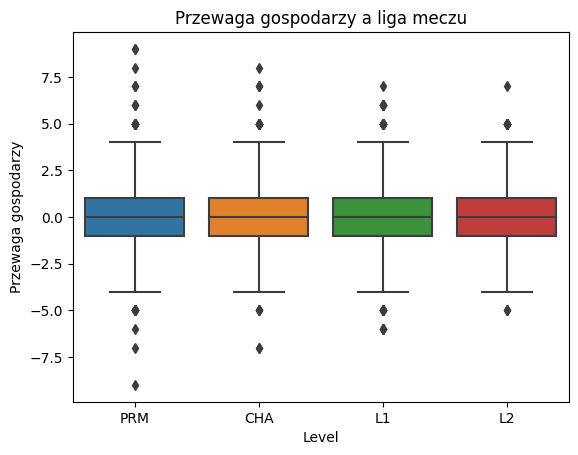

In [21]:
sns.boxplot(data=data, y = "Przewaga gospodarzy", x="Level")
plt.title("Przewaga gospodarzy a liga meczu")

Te wyniki trochę zawodzą. Można jedynie stwierdzić, że w niższych ligach jest mniej wyników, które znacząco odstają od przeciętnych. 

## Co innego wpływa na wygraną?

Text(0.5, 1.0, 'Oddane strzały przez konkretne strony w meczu')

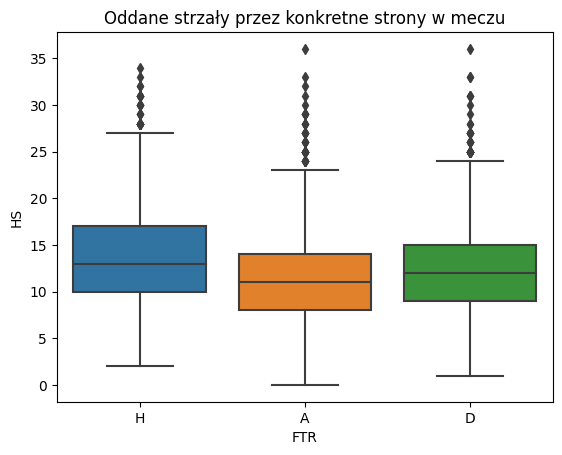

In [22]:
sns.boxplot(data=data, x = "FTR", y="HS")
plt.title('Oddane strzały przez konkretne strony w meczu')

Text(0.5, 1.0, 'Oddane strzały celne przez konkretne strony w meczu')

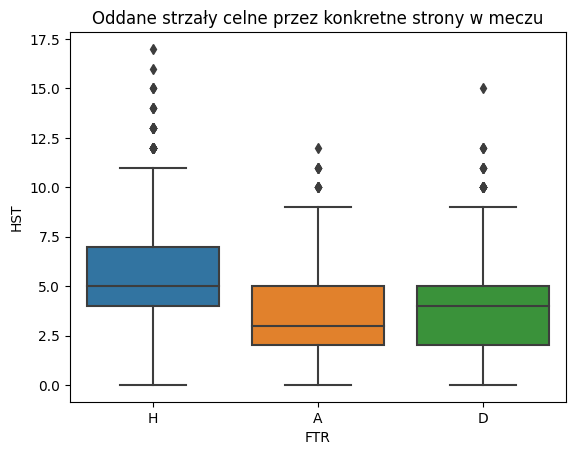

In [23]:
sns.boxplot(data=data, x = "FTR", y="HST")
plt.title('Oddane strzały celne przez konkretne strony w meczu')

W meczach, gdzie wygrywali gospodarze (H) oddawali oni więcej strzałów, jednak dużo większą różnicę widać w strzałach celnych. Można wysnuć wniosek, że lepiej obrazują one przewagę na boisku niż ogólna liczba strzałów.

# Sprawdźmy, jak to wszystko wygląda, gdy spróbujemy analizować wyniki konkretnych drużyn.

To moment, w którym grupujemy dane - ich analiza nastąpi za chwilę.

In [24]:
liczba_gier = (data["HomeTeam"].value_counts()+data["AwayTeam"].value_counts()).values
gole_gosp = data.groupby("HomeTeam")["FTHG"].sum().to_dict()
gole_gosc = data.groupby("AwayTeam")["FTAG"].sum().to_dict()
druzyny = pd.DataFrame()

druzyny["Nazwa"] = gole_gosp.keys()
druzyny["Gole jako gospodarze"] = gole_gosp.values()
druzyny["Gole jako goscie"] = gole_gosc.values()
druzyny["Suma goli"] = druzyny["Gole jako gospodarze"] + druzyny["Gole jako goscie"]
druzyny["Liczba gier"] = liczba_gier
druzyny["Średnia liczba goli na mecz"] = druzyny["Suma goli"] / druzyny["Liczba gier"]

zwyc_gosp = data.query("FTR == 'H'").groupby("HomeTeam")["FTR"].count().to_dict()
zwyc_gosc = data.query("FTR == 'A'").groupby("AwayTeam")["FTR"].count().to_dict()
druzyny["Zwyciestwa jako gospodarze"] = zwyc_gosp.values()
druzyny["Zwyciestwa jako goscie"] = zwyc_gosc.values()
druzyny["Zwyciestwa"] = druzyny["Zwyciestwa jako gospodarze"] +druzyny["Zwyciestwa jako goscie"]
druzyny["Procent zwyciestw"] = druzyny["Zwyciestwa"] / druzyny["Liczba gier"]

gole_gosp = data.groupby("HomeTeam")["HST"].sum().to_dict()
gole_gosc = data.groupby("AwayTeam")["AST"].sum().to_dict()
druzyny["Strzaly celne jako gospodarze"] = gole_gosp.values()
druzyny["Strzaly celne jako goscie"] = gole_gosc.values()
druzyny["Suma strzalow celnych"] = druzyny["Strzaly celne jako gospodarze"] + druzyny["Strzaly celne jako goscie"]
druzyny["Liczba gier"] = liczba_gier
druzyny["Średnia liczba strzalow celnych na mecz"] = druzyny["Suma strzalow celnych"] / druzyny["Liczba gier"]

druzyny

,Nazwa,Gole jako gospodarze,Gole jako goscie,Suma goli,Liczba gier,Średnia liczba goli na mecz,Zwyciestwa jako gospodarze,Zwyciestwa jako goscie,Zwyciestwa,Procent zwyciestw,Strzaly celne jako gospodarze,Strzaly celne jako goscie,Suma strzalow celnych,Średnia liczba strzalow celnych na mecz
0,AFC Wimbledon,103,87,190,173,1.098266,21,16,37,0.213873,337,293,630,3.641618
1,Accrington,132,79,211,173,1.219653,35,21,56,0.323699,398,346,744,4.300578
2,Arsenal,148,112,260,152,1.710526,45,35,80,0.526316,407,297,704,4.631579
3,Aston Villa,113,86,199,152,1.309211,32,24,56,0.368421,349,301,650,4.276316
4,Barnsley,122,98,220,184,1.195652,40,27,67,0.364130,397,333,730,3.967391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,West Brom,123,100,223,176,1.267045,36,27,63,0.357955,404,315,719,4.085227
92,West Ham,121,92,213,152,1.401316,33,23,56,0.368421,332,299,631,4.151316
93,Wigan,112,119,231,184,1.255435,33,32,65,0.353261,349,312,661,3.592391
94,Wolves,87,69,156,152,1.026316,31,22,53,0.348684,306,254,560,3.684211


## Czy strały celne wpływają na zwycięstwo

Sprawdźmy teraz, czy procent oddawanych przez drużynę strzałów celnych ma wpływ na zwycięstwo.
Warto zaznaczyć, że nie każdy strzał celny to gol. Strzał celny to także taki, który miał szansę trafić do bramki, jednak został obroniony.

Text(0.5, 1.0, 'Wykres procenta zwycięstw od średniej liczby strałów celnych na mecz')

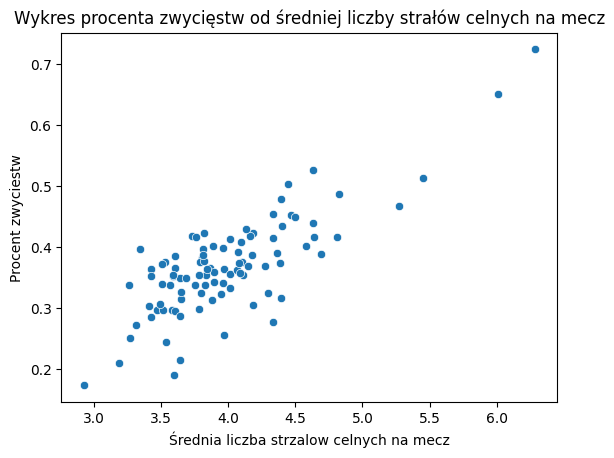

In [25]:
sns.scatterplot(data=druzyny, x='Średnia liczba strzalow celnych na mecz', y='Procent zwyciestw')
plt.title('Wykres procenta zwycięstw od średniej liczby strałów celnych na mecz')

Można się było tego spodziewać - drużyny oddające średnio w meczu więcej celnych strzałów mają zwykle większy procent zwycięstw.

## Skuteczność a zwycięstwo

Definiujemy **skuteczność** jako iloraz średniej liczby goli przez średnią liczbę strzałów celnych i sprawdzamy jej spływ na procent zwycięstw.

Text(0.5, 1.0, 'Wykres zależności procenta zwycięstw od skutecznosci')

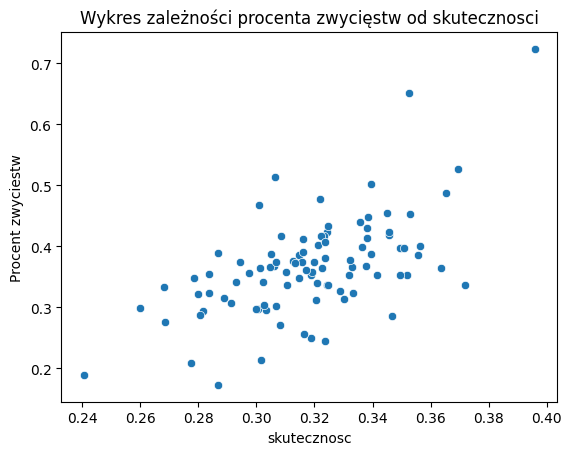

In [26]:
druzyny['skutecznosc'] = druzyny['Średnia liczba goli na mecz']/druzyny['Średnia liczba strzalow celnych na mecz']
sns.scatterplot(data=druzyny, x='skutecznosc', y='Procent zwyciestw')
plt.title('Wykres zależności procenta zwycięstw od skutecznosci')

Ta zależność jest słabsza. To również ma sens, ponieważ skuteczność nie zależy od umiejętności danej drużyny, a zamiast tego kluczowe są umiejętności bramkarza drużyny przeciwnej.

# Najlepsze drużyny

Sprawdźmy też coś podstawowego - jakie drużyny są najlepsze pod względem liczby goli i procenta zwycięstw.

## Drużyny o największej średniej liczbie goli na mecz

In [27]:
druzyny.sort_values(by='Średnia liczba goli na mecz', ascending=False).head(5)[['Nazwa','Suma goli', 'Średnia liczba goli na mecz']]

,Nazwa,Suma goli,Średnia liczba goli na mecz
50,Man City,378,2.486842
47,Liverpool,322,2.118421
87,Tottenham,268,1.763158
2,Arsenal,260,1.710526
51,Man United,254,1.671053


## Drużyny o największym procencie zwycięstw

In [28]:
druzyny.sort_values(by='Procent zwyciestw', ascending=False).head(5)[['Nazwa','Zwyciestwa', 'Procent zwyciestw']]

,Nazwa,Zwyciestwa,Procent zwyciestw
50,Man City,110,0.723684
47,Liverpool,99,0.651316
2,Arsenal,80,0.526316
51,Man United,78,0.513158
65,Plymouth,88,0.502857


Można zauważyć, że w obu kategoriach dominuje Man City i Liverpool. Wyniki najlepszych drużyn są podobne, ponieważ (to oczywiste), aby więcej wygrywać, trzeba więcej strzelać.


# Faule są dla słabych?

Często sugeruje się także, że drużyny słabsze grają ostrzej, czyli częściej faulują. Sprawdźmy to poprzez wizualizację zależności średniej liczby fauli na mecz od procenta zwycięstw.

In [29]:
faule_gosp = data.groupby("HomeTeam")["HF"].sum().to_dict()
faule_gosc = data.groupby("AwayTeam")["AF"].sum().to_dict()
druzyny["faule jako gospodarze"] = faule_gosp.values()
druzyny["faule jako goscie"] = faule_gosc.values()
druzyny["Suma fauli"] = druzyny["faule jako gospodarze"] + druzyny["faule jako goscie"]
druzyny["Liczba gier"] = liczba_gier
druzyny["Średnia liczba fauli na mecz"] = druzyny["Suma fauli"] / druzyny["Liczba gier"]

Text(0.5, 1.0, 'Wykres zależności średniej liczby fauli na mecz od procenta zwycięstw')

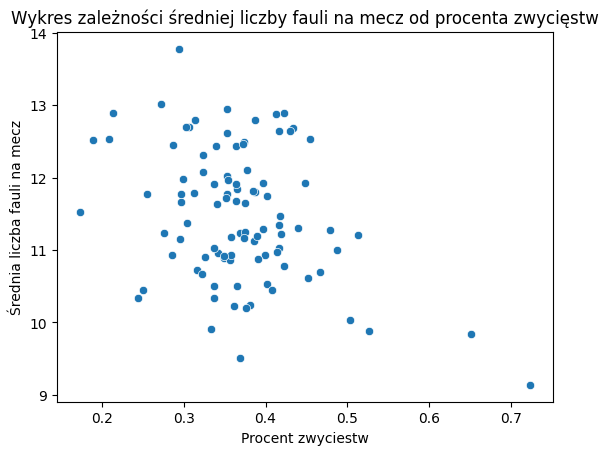

In [30]:
sns.scatterplot(data=druzyny, x='Procent zwyciestw', y='Średnia liczba fauli na mecz')
plt.title('Wykres zależności średniej liczby fauli na mecz od procenta zwycięstw')

Gorsze drużyny wcale nie faulują więcej, co może niektórych zaskoczyć.